# Tugas Proyek Data Science

### Nama: Nadea Putri Nur Fauzi

### NIM: 20110031

### Kelas: S1-SD-01A

# Klasifikasi Risiko Kredit Menggunakan Algoritma Random Forest dan Catboost

## Data Acquisition

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Sumber Dataset: https://www.kaggle.com/datasets/laotse/credit-risk-dataset

In [51]:
data = pd.read_csv('/content/drive/My Drive/dataset/CreditRisk.csv')
data.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [52]:
data = data.rename(columns={'person_age': 'Umur','person_income':'Pendapatan','person_home_ownership':'KepemilikanRumah',
                            'person_emp_length':'LamaKerja','loan_intent':'TujuanPeminjaman','loan_grade':'TingkatanPinjaman',
                            'loan_amnt':'JumlahPinjaman','loan_int_rate':'SukuBunga','loan_status':'StatusPinjaman','loan_percent_income':'%Pendapatan',
                            'cb_person_default_on_file':'HistoriPeminjaman','cb_person_cred_hist_length':'JumlahHistoriPeminjaman'})

In [53]:
data.head()

,Umur,Pendapatan,KepemilikanRumah,LamaKerja,TujuanPeminjaman,TingkatanPinjaman,JumlahPinjaman,SukuBunga,StatusPinjaman,%Pendapatan,HistoriPeminjaman,JumlahHistoriPeminjaman
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


###Variable Data

a.	Umur: Dalam Tahun - Diskrit 

d.	Lama Kerja: Dalam Tahun - Diskrit

g.	Jumlah Pinjaman: Dolar - Diskrit

l.	Jumlah Histori Pinjaman: Diskrit-kategorikal
_____________________________

b.	Pendapatan: Dalam Dolar per Tahun - Kontinu

h.	Suku Bunga: Kontinu

j.	Persentase Pinjaman: Kontinu | (JumlahPinjaman/Pendapatan)

_____________________________

c.	Kepemilikan Rumah: Kategorikal

e.	Tujuan Peminjaman: Kategorikal

f.	Grade Pinjaman: Kategorikal, BI Checking

i.	Status Pinjaman: KELAS - Kategorikal

k.	Histori Pinjaman: Kategorikal

## Data Exploration

In [54]:
data.shape

(32581, 12)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Umur                     32581 non-null  int64  
 1   Pendapatan               32581 non-null  int64  
 2   KepemilikanRumah         32581 non-null  object 
 3   LamaKerja                31686 non-null  float64
 4   TujuanPeminjaman         32581 non-null  object 
 5   TingkatanPinjaman        32581 non-null  object 
 6   JumlahPinjaman           32581 non-null  int64  
 7   SukuBunga                29465 non-null  float64
 8   StatusPinjaman           32581 non-null  int64  
 9   %Pendapatan              32581 non-null  float64
 10  HistoriPeminjaman        32581 non-null  object 
 11  JumlahHistoriPeminjaman  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [56]:
data.describe()

,Umur,Pendapatan,LamaKerja,JumlahPinjaman,SukuBunga,StatusPinjaman,%Pendapatan,JumlahHistoriPeminjaman
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [57]:
data.isnull().sum()

Umur                          0
Pendapatan                    0
KepemilikanRumah              0
LamaKerja                   895
TujuanPeminjaman              0
TingkatanPinjaman             0
JumlahPinjaman                0
SukuBunga                  3116
StatusPinjaman                0
%Pendapatan                   0
HistoriPeminjaman             0
JumlahHistoriPeminjaman       0
dtype: int64

In [58]:
print('Total Duplicated Values in dataframe are {0}'.format(data[data.duplicated()].shape[0]))

Total Duplicated Values in dataframe are 165


### Drop data duplicated

In [59]:
data.drop_duplicates(inplace=True)

In [60]:
data.shape

(32416, 12)

### Cek Perbandingan Kelas

In [61]:
data['StatusPinjaman'].value_counts()

0    25327
1     7089
Name: StatusPinjaman, dtype: int64

<Axes: xlabel='StatusPinjaman'>

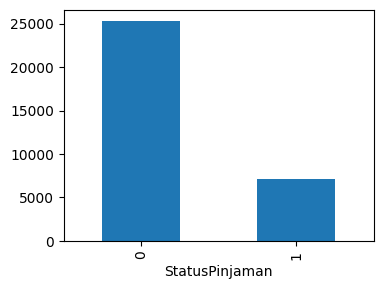

In [62]:
viz=data.groupby('StatusPinjaman').size()
viz.plot(kind='bar', figsize=(4,3))

### cek Missing Value

In [63]:
data.isnull().sum()

Umur                          0
Pendapatan                    0
KepemilikanRumah              0
LamaKerja                   887
TujuanPeminjaman              0
TingkatanPinjaman             0
JumlahPinjaman                0
SukuBunga                  3095
StatusPinjaman                0
%Pendapatan                   0
HistoriPeminjaman             0
JumlahHistoriPeminjaman       0
dtype: int64

### Percobaan 1: Delete Missing Value

In [64]:
data = data.dropna()

In [65]:
data.isnull().sum()

Umur                       0
Pendapatan                 0
KepemilikanRumah           0
LamaKerja                  0
TujuanPeminjaman           0
TingkatanPinjaman          0
JumlahPinjaman             0
SukuBunga                  0
StatusPinjaman             0
%Pendapatan                0
HistoriPeminjaman          0
JumlahHistoriPeminjaman    0
dtype: int64

In [66]:
data.shape

(28501, 12)

### Cek Korelasi Feature

<ipython-input-67-b4a1a3456242>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: title={'center': 'Correlation Between Variables'}>

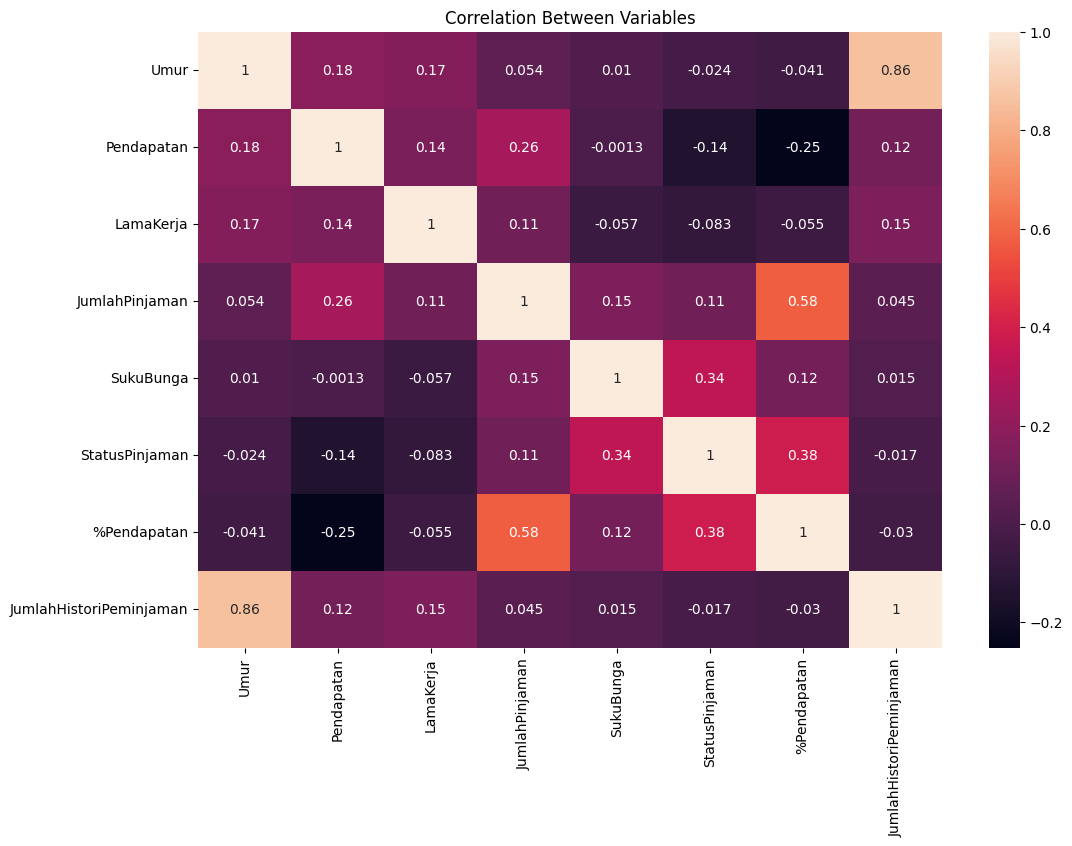

In [67]:
plt.figure(figsize=(12,8))
plt.title('Correlation Between Variables')

sns.heatmap(data.corr(), annot=True)

### Cek Persebaran Data Kategorikal

In [68]:
data['Umur'].nunique()

57

In [69]:
data['KepemilikanRumah'].value_counts()

RENT        14498
MORTGAGE    11736
OWN          2174
OTHER          93
Name: KepemilikanRumah, dtype: int64

In [70]:
data['TujuanPeminjaman'].value_counts()

EDUCATION            5670
MEDICAL              5269
VENTURE              4969
PERSONAL             4859
DEBTCONSOLIDATION    4547
HOMEIMPROVEMENT      3187
Name: TujuanPeminjaman, dtype: int64

In [71]:
data['TingkatanPinjaman'].value_counts()

A    9345
B    9094
C    5682
D    3243
E     869
F     209
G      59
Name: TingkatanPinjaman, dtype: int64

In [72]:
data['JumlahHistoriPeminjaman'].value_counts()

3     5201
2     5192
4     5189
7     1670
8     1659
9     1659
5     1656
6     1635
10    1632
14     436
12     424
11     410
13     387
16     385
15     370
17     346
20      29
24      27
28      22
22      21
23      19
30      19
19      18
27      18
21      18
25      17
26      16
18      15
29      11
Name: JumlahHistoriPeminjaman, dtype: int64

### Cek Persebaran Data Numerik

In [73]:
data1 = data.copy()

In [74]:
data1 = data1.drop(columns=['KepemilikanRumah','TujuanPeminjaman','TingkatanPinjaman','StatusPinjaman','JumlahHistoriPeminjaman'])

In [75]:
data1.head(10)

,Umur,Pendapatan,LamaKerja,JumlahPinjaman,SukuBunga,%Pendapatan,HistoriPeminjaman
0,22,59000,123.0,35000,16.02,0.59,Y
1,21,9600,5.0,1000,11.14,0.10,N
2,25,9600,1.0,5500,12.87,0.57,N
3,23,65500,4.0,35000,15.23,0.53,N
4,24,54400,8.0,35000,14.27,0.55,Y
5,21,9900,2.0,2500,7.14,0.25,N
6,26,77100,8.0,35000,12.42,0.45,N
7,24,78956,5.0,35000,11.11,0.44,N
8,24,83000,8.0,35000,8.90,0.42,N
9,21,10000,6.0,1600,14.74,0.16,N


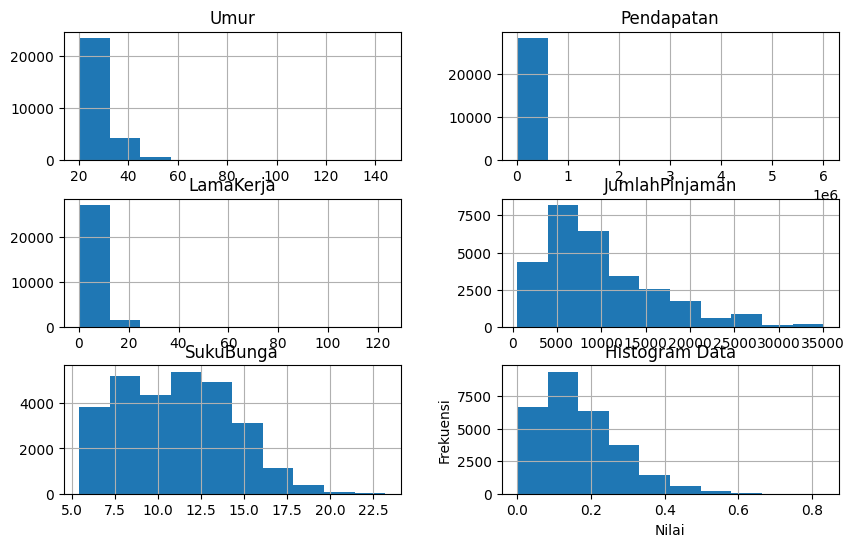

In [76]:
data1.hist(bins=10, figsize=(10, 6))
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.title('Histogram Data')
plt.show()

<Axes: >

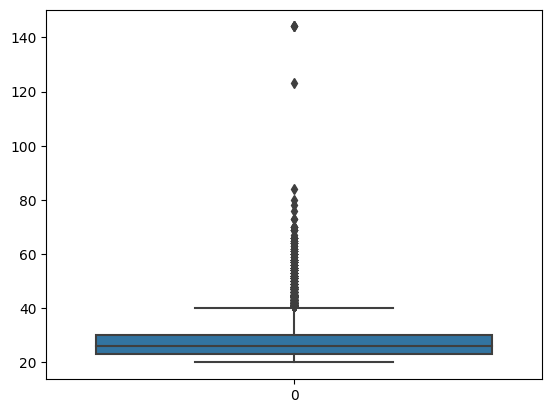

In [77]:
sns.boxplot(data=data['Umur'])

<Axes: >

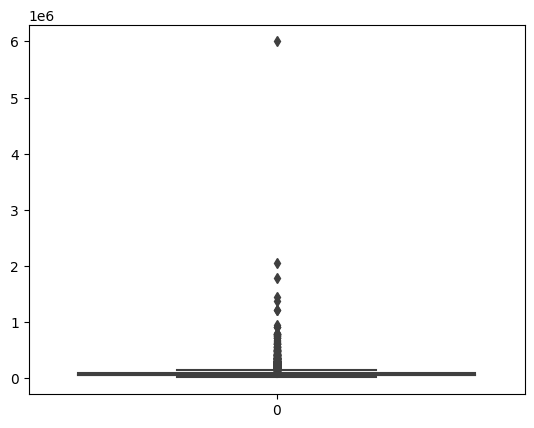

In [78]:
sns.boxplot(data=data['Pendapatan'])

<Axes: >

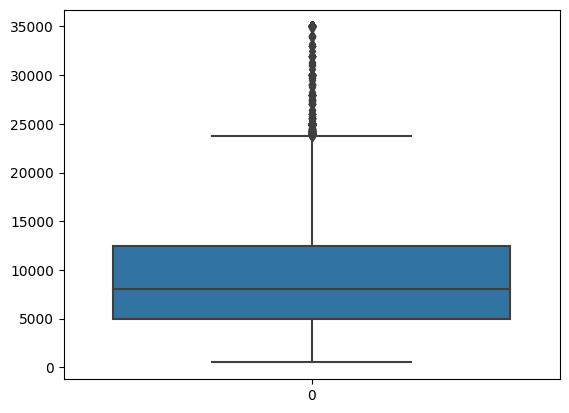

In [79]:
sns.boxplot(data=data['JumlahPinjaman'])

<Axes: >

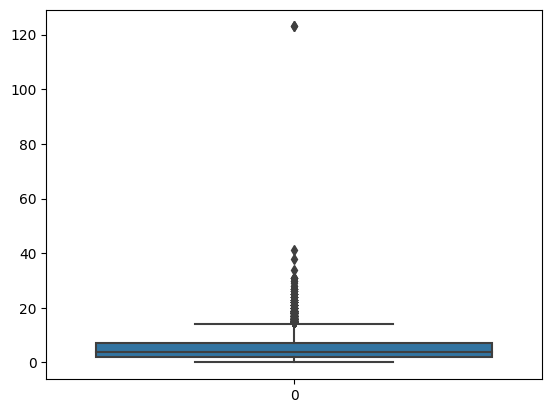

In [80]:
sns.boxplot(data=data['LamaKerja'])

<Axes: >

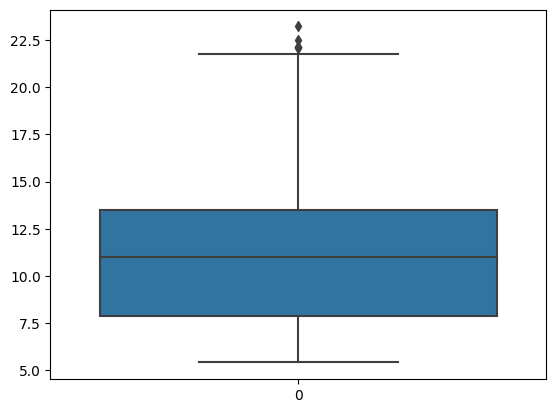

In [81]:
sns.boxplot(data=data['SukuBunga'])

## Feature Engineering

Seleksi Fitur - Drop Fitur, etc

### Drop Feature

In [82]:
data = data.drop('HistoriPeminjaman', axis=1)

In [83]:
data.head()

,Umur,Pendapatan,KepemilikanRumah,LamaKerja,TujuanPeminjaman,TingkatanPinjaman,JumlahPinjaman,SukuBunga,StatusPinjaman,%Pendapatan,JumlahHistoriPeminjaman
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,4


In [84]:
data = data.drop('%Pendapatan', axis=1)

In [85]:
data.head()

,Umur,Pendapatan,KepemilikanRumah,LamaKerja,TujuanPeminjaman,TingkatanPinjaman,JumlahPinjaman,SukuBunga,StatusPinjaman,JumlahHistoriPeminjaman
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,4


### Drop data outliers

In [86]:
data = data[data['Umur'] <= 120]

In [87]:
data['Umur'].value_counts()

23    3390
22    3144
24    3109
25    2686
26    2188
27    1880
28    1619
29    1488
30    1122
21    1048
31    1006
32     857
33     757
34     624
35     558
36     481
37     409
38     321
39     269
40     235
41     218
42     164
43     142
44     116
45      91
46      86
47      76
48      65
50      45
49      40
51      33
52      33
53      26
54      21
55      18
58      17
57      15
56      14
20      14
60      13
61       8
66       8
64       7
62       6
69       5
65       5
70       5
59       5
63       3
73       2
78       1
80       1
84       1
76       1
67       1
Name: Umur, dtype: int64

In [88]:
data = data[data['Pendapatan'] <= 5000000000]

<Axes: >

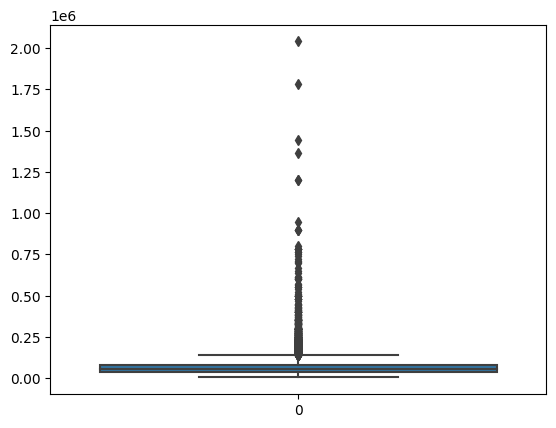

In [89]:
sns.boxplot(data=data['Pendapatan'])

In [90]:
data = data[data['LamaKerja'] <= 120]

### Cek Data Selesai FE

In [91]:
data.head()

,Umur,Pendapatan,KepemilikanRumah,LamaKerja,TujuanPeminjaman,TingkatanPinjaman,JumlahPinjaman,SukuBunga,StatusPinjaman,JumlahHistoriPeminjaman
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,2


In [92]:
data.shape

(28495, 10)

## Encoding Data

In [93]:
from sklearn.preprocessing import LabelEncoder

In [94]:
le = [LabelEncoder(), LabelEncoder(), LabelEncoder()]

data['KepemilikanRumah'] = le[0].fit_transform(data['KepemilikanRumah'])
data['TujuanPeminjaman'] = le[1].fit_transform(data['TujuanPeminjaman'])
data['TingkatanPinjaman'] = le[2].fit_transform(data['TingkatanPinjaman'])

In [95]:
data.head()

,Umur,Pendapatan,KepemilikanRumah,LamaKerja,TujuanPeminjaman,TingkatanPinjaman,JumlahPinjaman,SukuBunga,StatusPinjaman,JumlahHistoriPeminjaman
1,21,9600,2,5.0,1,1,1000,11.14,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,3
3,23,65500,3,4.0,3,2,35000,15.23,1,2
4,24,54400,3,8.0,3,2,35000,14.27,1,4
5,21,9900,2,2.0,5,0,2500,7.14,1,2


In [96]:
kurs = 14000

data['Pendapatan'] = data['Pendapatan'] * kurs
data['JumlahPinjaman'] = data['JumlahPinjaman'] * kurs
data.head()

,Umur,Pendapatan,KepemilikanRumah,LamaKerja,TujuanPeminjaman,TingkatanPinjaman,JumlahPinjaman,SukuBunga,StatusPinjaman,JumlahHistoriPeminjaman
1,21,134400000,2,5.0,1,1,14000000,11.14,0,2
2,25,134400000,0,1.0,3,2,77000000,12.87,1,3
3,23,917000000,3,4.0,3,2,490000000,15.23,1,2
4,24,761600000,3,8.0,3,2,490000000,14.27,1,4
5,21,138600000,2,2.0,5,0,35000000,7.14,1,2


## Pre Modelling

In [97]:
x = data.drop(columns='StatusPinjaman')
y = data['StatusPinjaman']

In [98]:
x.shape, y.shape

((28495, 9), (28495,))

In [103]:
from sklearn.model_selection import train_test_split, GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(x,y ,train_size=0.7)

## Modelling

### Random Forest Algorithm

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [101]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [102]:
rf_model = RandomForestClassifier()

In [104]:
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [105]:
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best accuracy found:  0.9272031922372991


In [106]:
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(x_test, y_test)
print("Test accuracy: ", test_accuracy)

Test accuracy:  0.924201661012984


In [ ]:
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(x_train, y_train)
# y_pred = model.predict(x_test)

# accuracy = accuracy_score(y_test, y_pred)
# print(accuracy)

0.925956252193239


### Catboost Algorithm

In [107]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 2.2 MB/s eta 0:00:00


In [108]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

In [109]:
param_grid1 = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5],
    'depth': [4, 6, 8]
}

In [110]:
catboost_model = CatBoostClassifier()

In [111]:
grid_search = GridSearchCV(catboost_model, param_grid1, cv=5)
grid_search.fit(x_train, y_train)

Streaming output truncated to the last 5000 lines.
0:	learn: 0.4055249	total: 10.3ms	remaining: 2.06s
1:	learn: 0.3202666	total: 19.9ms	remaining: 1.97s
2:	learn: 0.2781503	total: 29.6ms	remaining: 1.94s
3:	learn: 0.2648962	total: 38.7ms	remaining: 1.9s
4:	learn: 0.2542026	total: 48.1ms	remaining: 1.88s
5:	learn: 0.2430294	total: 57.1ms	remaining: 1.85s
6:	learn: 0.2353715	total: 66.5ms	remaining: 1.83s
7:	learn: 0.2325391	total: 75.6ms	remaining: 1.81s
8:	learn: 0.2305284	total: 84.2ms	remaining: 1.79s
9:	learn: 0.2275825	total: 94.6ms	remaining: 1.8s
10:	learn: 0.2242349	total: 113ms	remaining: 1.95s
11:	learn: 0.2178668	total: 124ms	remaining: 1.94s
12:	learn: 0.2131102	total: 134ms	remaining: 1.92s
13:	learn: 0.2123439	total: 139ms	remaining: 1.85s
14:	learn: 0.2104453	total: 148ms	remaining: 1.83s
15:	learn: 0.2076486	total: 158ms	remaining: 1.81s
16:	learn: 0.2057865	total: 172ms	remaining: 1.85s
17:	learn: 0.2047079	total: 181ms	remaining: 1.83s
18:	learn: 0.2030157	total: 190ms

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f4a4db6e170>,
             param_grid={'depth': [4, 6, 8], 'iterations': [100, 200, 300],
                         'learning_rate': [0.01, 0.1, 0.5]})

In [112]:
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

Best parameters found:  {'depth': 6, 'iterations': 300, 'learning_rate': 0.1}
Best accuracy found:  0.9317654879238708


In [114]:
best_modelCb = grid_search.best_estimator_
test_accuracy = best_model.score(x_test, y_test)
print("Test accuracy: ", test_accuracy)

Test accuracy:  0.9308691074979529


In [115]:
import pickle

with open('modelRF.pkl','wb') as f:
    pickle.dump(best_model,f)

In [116]:
with open('modelCb.pkl','wb') as f:
    pickle.dump(best_modelCb,f)

In [119]:
filename = 'stress_trained.sav'
pickle.dump(best_modelCb,open(filename,'wb'))

Predict

In [122]:
input_data = (25, 145000000, 2, 1,2,3,500000,11.14,2) 

id_np_array = np.asarray(input_data)
id_reshaped = id_np_array.reshape(1,-1)

prediction = best_modelCb.predict(id_reshaped)
print(prediction)

if(prediction[0]==0):
    print("Credit Status: Tidak Bermasalah")
else:
    print("Credit Status: Bermasalah")

[0]
Credit Status: Tidak Bermasalah


Umur	Pendapatan	KepemilikanRumah	LamaKerja	TujuanPeminjaman TingkatanPinjaman	JumlahPinjaman	SukuBunga	StatusPinjaman	JumlahHistoriPeminjaman

## HASIL AKURASI 2 ALGORITMA

Random Forest: 92.6%

Catboost: 93.2%